### Prepare notebook with relevant modules

In [1]:
%pip install -U odp-sdk --quiet 2>/dev/null

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ODPworkspace_demotools import mapOQS, pydeck_plot
##import the SDK
from odp.client import OdpClient

In [4]:
client = OdpClient()

## Querying Tabular Data
- Need to get the uuid from the dataset in the [catalog](https://app.hubocean.earth/catalog)
- Example from [GLODAP dataset](https://app.hubocean.earth/catalog/dataset/glodap)
- ![title](figs/API_uuid_pic2.png)

In [6]:
ref = "8a477f7b-8fd5-403e-b021-89dda7848997"

#### Explore the dataset through the catalog functions

In [7]:
data_cat = client.catalog.get(("8a477f7b-8fd5-403e-b021-89dda7848997"))
data_cat.metadata.display_name

'Global Ocean Data Analysis Project (GLODAP) data'

In [8]:
data_cat.metadata.description

'This dataset consists of the GLODAPv2.2022 data product composed of data from 1085 scientific cruises covering the global ocean between 1972 and 2021. It includes full depth discrete bottle measurements of salinity, oxygen, nitrate, silicate, phosphate, dissolved inorganic carbon (TCO2), total alkalinity (TAlk), CO2 fugacity (fCO2), pH, chlorofluorocarbons (CFC-11, CFC-12, CFC-113, and CCl4), SF6, and various isotopes and organic compounds.'

#### Pull the data
- See [documentation](https://docs.hubocean.earth/) to see otherways to interact with the data through the SDK

In [9]:
data = client.tabular.select_as_list(data_cat, limit=100)

In [10]:
data[0:1]

[{'G2fco2': -9999.0,
  'G2c14err': -9999.0,
  'G2silicate': -9999.0,
  'G2region': 4,
  'G2talk': -9999.0,
  'G2cruise': 1,
  'G2tco2f': 9,
  'G2pcfc12': -9999.0,
  'G2he': -9999.0,
  'G2aouf': 9,
  'G2nitrateqc': 1,
  'G2ccl4f': 9,
  'G2salinityf': 2,
  'G2talkf': 9,
  'G2donf': 9,
  'G2hef': 9,
  'G2tco2': -9999.0,
  'G2phosphatef': 9,
  'G2phtsinsitutp': -9999.0,
  'G2toc': -9999.0,
  'G2year': 1984,
  'G2c14f': 9,
  'G2oxygenqc': 1,
  'G2oxygenf': 9,
  'G2cfc113qc': 0,
  'G2c13f': 9,
  'G2depth': 9.0,
  'G2phosphate': -9999.0,
  'G2temperature': 0.4049,
  'G2silicateqc': 1,
  'G2sigma3': 40.593,
  'G2hour': 14,
  'G2chla': -9999.0,
  'G2fco2f': 9,
  'G2neon': -9999.0,
  'G2day': 20,
  'G2talkqc': 0,
  'G2chlaf': 9,
  'G2phosphateqc': 1,
  'G2pcfc113': -9999.0,
  'G2psf6': -9999.0,
  'G2h3err': -9999.0,
  'G2nitratef': 9,
  'G2sf6qc': 0,
  'G2ccl4': -9999.0,
  'G2tocf': 9,
  'G2fco2temp': -9999,
  'G2c14': -9999.0,
  'G2bottle': 1,
  'G2c13qc': 0,
  'G2sigma4': 44.99,
  'G2salinity'

In [11]:
df = pd.DataFrame(data[0:100])
df.head()

,G2fco2,G2c14err,G2silicate,G2region,G2talk,G2cruise,G2tco2f,G2pcfc12,G2he,G2aouf,...,G2docf,G2nitrite,G2tdnf,G2nitrate,G2he3,G2tdn,G2sigma2,G2ccl4qc,geometry,G2phts25p0
0,-9999.0,-9999.0,-9999.0,4,-9999.0,1,9,-9999.0,-9999.0,9,...,9,-9999.0,9,-9999.0,-9999.0,-9999.0,36.093,0,"{'type': 'Point', 'coordinates': [7.2267, 80.5...",-9999.0
1,-9999.0,-9999.0,-9999.0,4,-9999.0,1,9,-9999.0,-9999.0,9,...,9,-9999.0,9,-9999.0,-9999.0,-9999.0,35.974,0,"{'type': 'Point', 'coordinates': [7.2267, 80.5...",-9999.0
2,-9999.0,-9999.0,-9999.0,4,-9999.0,1,9,-9999.0,-9999.0,9,...,9,-9999.0,9,-9999.0,-9999.0,-9999.0,36.968,0,"{'type': 'Point', 'coordinates': [7.2267, 80.5...",-9999.0
3,-9999.0,-9999.0,-9999.0,4,-9999.0,1,9,-9999.0,-9999.0,9,...,9,-9999.0,9,-9999.0,-9999.0,-9999.0,36.965,0,"{'type': 'Point', 'coordinates': [7.2267, 80.5...",-9999.0
4,-9999.0,-9999.0,-9999.0,4,-9999.0,1,9,-9999.0,-9999.0,9,...,9,-9999.0,9,-9999.0,-9999.0,-9999.0,37.091,0,"{'type': 'Point', 'coordinates': [7.2267, 80.5...",-9999.0


## Geospatial query of data
- Either define a polygon manually
- Or use the interactive map to create a polygon

### Use a map to create a geospatial query for the API call
- Run the cell below, zoome into an area of choice and click on the 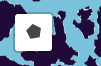 button to create a polygon for the query

In [12]:
query_geometry = mapOQS()

#### Or define the query geometry manually (just remove the '#' and edit coordinates below)

In [69]:
#query_geometry.value = "POLYGON((-37.397 -11.953, -35.640 -9.015, -32.256 -10.272, -36.079 -16.678, -37.397 -11.953))"

#### Let's stick with the same dataset for now

#### Request geospatially filtered data from ODP API

In [13]:
filter_query = {'#ST_WITHIN': ['$geometry',query_geometry.value]}

filtered_data = client.tabular.select_as_list(data_cat, filter_query, limit=1000)

In [14]:
filtered_data[0:1]

[{'G2fco2': -9999.0,
  'G2c14err': -9999.0,
  'G2silicate': -9999.0,
  'G2region': 1,
  'G2talk': -9999.0,
  'G2cruise': 344,
  'G2tco2f': 9,
  'G2pcfc12': -9999.0,
  'G2he': -9999.0,
  'G2aouf': 2,
  'G2nitrateqc': 1,
  'G2ccl4f': 9,
  'G2salinityf': 2,
  'G2talkf': 9,
  'G2donf': 9,
  'G2hef': 9,
  'G2tco2': -9999.0,
  'G2phosphatef': 9,
  'G2phtsinsitutp': -9999.0,
  'G2toc': -9999.0,
  'G2year': 2007,
  'G2c14f': 9,
  'G2oxygenqc': 1,
  'G2oxygenf': 2,
  'G2cfc113qc': 1,
  'G2c13f': 9,
  'G2depth': 3.8,
  'G2phosphate': -9999.0,
  'G2temperature': 29.072,
  'G2silicateqc': 0,
  'G2sigma3': 30.662,
  'G2hour': 4,
  'G2chla': -9999.0,
  'G2fco2f': 9,
  'G2neon': -9999.0,
  'G2day': 11,
  'G2talkqc': 1,
  'G2chlaf': 9,
  'G2phosphateqc': 1,
  'G2pcfc113': -9999.0,
  'G2psf6': -9999.0,
  'G2h3err': -9999.0,
  'G2nitratef': 9,
  'G2sf6qc': 0,
  'G2ccl4': -9999.0,
  'G2tocf': 9,
  'G2fco2temp': -9999,
  'G2c14': -9999.0,
  'G2bottle': 18,
  'G2c13qc': 0,
  'G2sigma4': 34.575,
  'G2salini

In [15]:
df = pd.DataFrame(filtered_data[0::100]).head()

In [16]:
df.head()

,G2fco2,G2c14err,G2silicate,G2region,G2talk,G2cruise,G2tco2f,G2pcfc12,G2he,G2aouf,...,G2docf,G2nitrite,G2tdnf,G2nitrate,G2he3,G2tdn,G2sigma2,G2ccl4qc,geometry,G2phts25p0
0,-9999.00,-9999.0,-9999.0,1,-9999.0,344,9,-9999.0,-9999.0,2,...,9,-9999.00,9,-9999.000,-9999.0,-9999.0,26.664,0,"{'type': 'Point', 'coordinates': [-94.999, 28....",-9999.0000
1,437.20,-9999.0,2.7,1,2385.5,344,2,-9999.0,-9999.0,2,...,9,0.08,9,5.047,-9999.0,-9999.0,34.456,0,"{'type': 'Point', 'coordinates': [-95.0, 27.499]}",7.9473
2,263.20,-9999.0,1.1,1,2396.9,344,2,-9999.0,-9999.0,2,...,2,0.03,9,0.000,-9999.0,-9999.0,30.244,0,"{'type': 'Point', 'coordinates': [-90.0, 28.082]}",8.1260
3,-9999.00,-9999.0,4.4,1,-9999.0,344,9,-9999.0,-9999.0,2,...,9,-9999.00,9,0.000,-9999.0,-9999.0,30.496,0,"{'type': 'Point', 'coordinates': [-83.001, 28.0]}",-9999.0000
4,277.94,-9999.0,1.4,1,2362.9,344,2,-9999.0,-9999.0,2,...,9,0.11,9,0.000,-9999.0,-9999.0,31.297,0,"{'type': 'Point', 'coordinates': [-85.997, 25....",8.1039


### Downloading raw data


#### Get uuid from catalog - this is the id for the dataset


In [21]:
resource_manifest = client.catalog.get( "83330068-ef1c-4204-b675-c7f1652a513c"÷)
resource_manifest

ResourceDto(kind='catalog.hubocean.io/dataset', version='v1alpha3', metadata=Metadata(name='1e3401d4-9630-40cd-a9cf-d875cb310449-wpi-file', display_name='world-port-index-file', description='The World Port Index (Pub 150) contains the location and physical characteristics of, and the facilities and services offered by major ports and terminals world-wide.', uuid=UUID('83330068-ef1c-4204-b675-c7f1652a513c'), labels={'catalog.hubocean.io/released': True}, owner=UUID('ad43fbc5-2453-4559-b1b1-322e00921a7a')), status=ResourceStatus(num_updates=1, created_time=datetime.datetime(2024, 4, 9, 9, 31, 34, 694468), created_by=UUID('ad43fbc5-2453-4559-b1b1-322e00921a7a'), updated_time=datetime.datetime(2024, 4, 12, 11, 39, 14, 814270), updated_by=UUID('f075a9ec-fe09-447e-9f39-6217c0e97500'), deleted_time=None, deleted_by=None), spec=DatasetSpec(storage_class='registry.hubocean.io/storageClass/raw', storage_controller='registry.hubocean.io/storageController/storage-raw-cdffs', data_collection='catal

#### Need to also get the file uuid within the dataset

There may be multiple files within a dataset, by running the code below you can download all the files

In [37]:
for file_metadata in client.raw.list(resource_manifest):
    print(file_metadata)

    client.raw.download_file(data_cat, file_metadata, "name_of_downloaded_file.csv")

name='UpdatedPub150.csv' mime_type='text/csv' dataset=UUID('83330068-ef1c-4204-b675-c7f1652a513c') metadata={'hubocean.io/app': 'odcat', 'hubocean.io/dataset': '83330068-ef1c-4204-b675-c7f1652a513c'} geo_location=None size_bytes=3521207 checksum='ea58b96fc0d420eefac2465ac0c3e255' created_time=datetime.datetime(2024, 4, 9, 9, 31, 37, 16000) modified_time=datetime.datetime(2024, 4, 9, 9, 31, 44, 56000) deleted_time=None
